In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df=pd.read_csv('imdb_movies.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [89]:
df.shape

(10178, 12)

In [90]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


CLEANING THE DATA

In [91]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [92]:
df['genre'].value_counts()

genre
Drama                                                   556
Comedy                                                  373
Drama, Romance                                          268
Horror                                                  260
Horror, Thriller                                        202
                                                       ... 
Action, Animation, Crime, Drama                           1
Adventure, Animation, Family, Action                      1
Drama, Animation, Family, Comedy, Fantasy                 1
Science Fiction, War                                      1
Action, Adventure, Science Fiction, Thriller, Horror      1
Name: count, Length: 2303, dtype: int64

In [93]:
df['genre'].unique()

array(['Drama,\xa0Action', 'Science Fiction,\xa0Adventure,\xa0Action',
       'Animation,\xa0Adventure,\xa0Family,\xa0Fantasy,\xa0Comedy', ...,
       'Adventure,\xa0Comedy,\xa0Family,\xa0Science Fiction,\xa0Action',
       'Mystery,\xa0Thriller,\xa0Comedy',
       'Action,\xa0Adventure,\xa0Science Fiction,\xa0Thriller,\xa0Horror'],
      dtype=object)

In [94]:
df['genre'] = df['genre'].str.replace('\xa0', ' ', regex=True)
df['genre'].unique()

array(['Drama, Action', 'Science Fiction, Adventure, Action',
       'Animation, Adventure, Family, Fantasy, Comedy', ...,
       'Adventure, Comedy, Family, Science Fiction, Action',
       'Mystery, Thriller, Comedy',
       'Action, Adventure, Science Fiction, Thriller, Horror'],
      dtype=object)

In [95]:
df = df.dropna(subset=['genre'])
df = df.dropna(subset=['crew'])

In [96]:
df.isnull().sum()
from scipy.stats import zscore
df['z_score'] = zscore(df['budget_x'])
outliers = df[df['z_score'].abs() > 3]
from scipy.stats import zscore
df['z_score'] = zscore(df['revenue'])
revenue = df[df['z_score'].abs() > 3]

In [97]:
df.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
z_score       float64
dtype: object

In [98]:
df.head(1)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,z_score
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU,0.073812


In [99]:
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')
df['genre'] = df['genre'].astype('category')

In [100]:
has_nat = df['date_x'].isna().any()
has_nat

np.False_

In [101]:
df.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre               category
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
z_score              float64
dtype: object

In [102]:

df['ROI'] = (df['revenue'] - df['budget_x']) / df['budget_x']


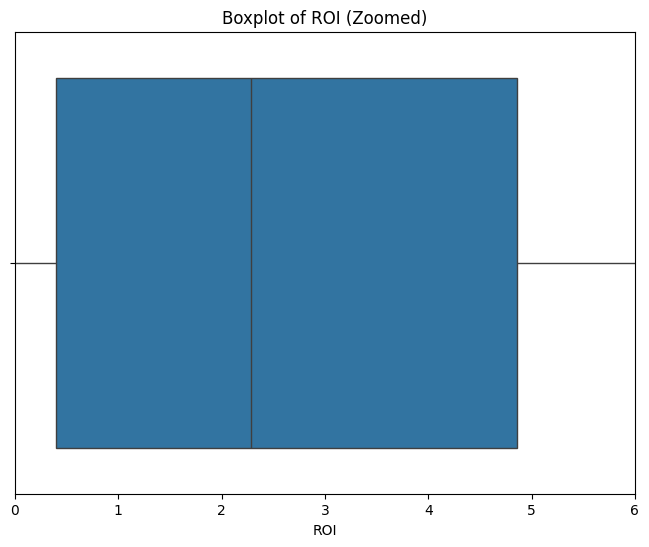

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ROI'])
plt.xlim(0, 6) 
plt.title('Boxplot of ROI (Zoomed)')
plt.xlabel('ROI')
plt.show()


In [104]:
count_high_roi = df[df['ROI'] > 1000]
count_high_roi

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,z_score,ROI
26,Shark Side of the Moon,2022-08-12,53.0,"Action, Science Fiction, Thriller, Horror","Decades ago, the USSR developed unkillable sha...","Maxi Witrak, Commander Nicole Tress, Ego Mikit...",Shark Side of the Moon,Released,English,10000.0,17887093.8,US,-0.843717,1.787709e+03
150,Savage Salvation,2022-12-02,66.0,Thriller,Newly engaged Shelby John and Ruby Red want a ...,"Jack Huston, Shelby John, Robert De Niro, Sher...",Savage Salvation,Released,English,85645.0,244880855.2,US,-0.022869,2.858255e+03
192,20th Century Girl,2022-10-06,83.0,"Romance, Drama",Yeon-du asks her best friend Bora to collect a...,"Kim You-jung, Na Bo-ra, Byeon Woo-seok, Poong ...",20세기 소녀,Released,Korean,119.0,77132590.4,KR,-0.629475,6.481720e+05
278,Whisper,2022-01-23,64.0,"Horror, Thriller",A young Nurse is assigned to look after a pati...,"Linda Louise Duan, Sam, Penelope Read, Dr. Car...",Whisper,Released,English,20000.0,211802400.4,GB,-0.142486,1.058912e+04
1083,Ciao Alberto,2021-11-12,75.0,"Animation, Comedy, Family, Fantasy","With his best friend Luca away at school, Albe...","Jack Dylan Grazer, Alberto Scorfano (voice), M...",Ciao Alberto,Released,English,45223.0,57635198.8,US,-0.699981,1.273467e+03
2001,Cannibal Holocaust,1980-02-07,63.0,Horror,A New York University professor returns from a...,"Robert Kerman, Professor Harold Monroe, France...",Cannibal Holocaust,Released,Italian,100000.0,183851589.4,IT,-0.243561,1.837516e+03
2177,Europa Report,2013-07-08,63.0,"Science Fiction, Thriller",A crew of international astronauts are sent on...,"Anamaria Marinca, Rosa Dasque, Michael Nyqvist...",Europa Report,Released,English,125687.0,164148886.4,AU,-0.314809,1.305013e+03
2349,The Platform,2020-03-20,70.0,"Drama, Science Fiction, Thriller","A mysterious place, an indescribable prison, a...","Iván Massagué, Goreng, Antonia San Juan, Imogu...",El hoyo,Released,"Spanish, Castilian",600.0,214883443.8,AU,-0.131345,3.581381e+05
2420,Love to Kill,1993-11-18,48.0,"Drama, Horror",A woman looks to a cop for help against her ab...,"Anthony Wong, Sam Wai Wong, Danny Lee Sau-Yin,...",虐之戀,Released,Cantonese,87.0,1442918.2,HK,-0.903182,1.658427e+04
2805,Down,2019-02-01,69.0,"Horror, Drama, Thriller",A pair of coworkers gets trapped in an elevato...,"Natalie Martinez, Jennifer, Matt Lauria, Guy, ...",Down,Released,English,1.0,257720413.2,US,0.023561,2.577204e+08


In [105]:
df = df[df['budget_x'] >= 10000]

In [111]:
df.shape

(9925, 14)

In [112]:
count_high_roi = df[df['ROI'] > 100].shape[0]
count_high_roi

0

In [110]:
df=df[df['ROI']<=100]

In [117]:

def categorize_roi(roi):
    if roi < 0:
        return "Loss"
    elif roi < 2:
        return "Low ROI"
    elif roi < 4:
        return "Medium ROI"
    else:
        return "High ROI"

df['ROI_V'] = df['ROI'].apply(categorize_roi)


In [118]:
df.head(2)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,z_score,ROI,ROI_V
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,0.073812,2.621556,Medium ROI
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,7.469523,4.036511,High ROI
